In [6]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Cross Tabulation

- Really this is somewhat irrelevant to add here (or in any notebook becuase we removed the "other" column types which means we will not see the representaion of the data in the "other" group becuase it is all imputed or removed already. With this in mind, so that we can visualize the NAN in the cross-tabulation we will create an NAN group so that we can see if the NAN has any value in the data. (yes this means it will look the same in each book). 

- Also know that the response variable had to be created from Pass/Fail since our normal response is continous var.

In [ ]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df.fillna("NAN_DATA", inplace = True)

In [ ]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"

In [ ]:
df["MathResult"] = df["MathScore"].apply(pass_fail)

In [ ]:
df["ReadingResult"] = df["ReadingScore"].apply(pass_fail)


In [ ]:
df["WritingResult"] = df["WritingScore"].apply(pass_fail)

In [ ]:
# Cross-Tab - MATH

cross_tab = pd.crosstab(df['WklyStudyHours'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['MathResult'], dropna=False)
print("\n",cross_tab)

In [ ]:
# Cross-Tab - READING

cross_tab = pd.crosstab(df['WklyStudyHours'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['ReadingResult'], dropna=False)
print("\n",cross_tab)

In [ ]:
# Cross-Tab - WRITING

cross_tab = pd.crosstab(df['WklyStudyHours'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['WritingResult'], dropna=False)
print("\n",cross_tab)

## Decision Tree on Removed NAN data 

In [13]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [14]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Remove rows with null values
df.dropna(inplace=True)

# Separate the input features (including the categorical variables) and the response variables
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)  # Input features
y_math = df['MathScore']  # Math score as the response variable
y_reading = df['ReadingScore']  # Reading score as the response variable
y_writing = df['WritingScore']  # Writing score as the response variable

# Perform one-hot encoding on the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math, y_train_reading, y_test_reading, y_train_writing, y_test_writing = train_test_split(
    X_encoded, y_math, y_reading, y_writing, test_size=0.2, random_state=42
)

# Initialize and fit the decision tree model for MathScore prediction
model_math = DecisionTreeRegressor(random_state=42)
model_math.fit(X_train, y_train_math)

# Evaluate the MathScore model on the testing set
y_pred_math = model_math.predict(X_test)
mse_math = mean_squared_error(y_test_math, y_pred_math)
print("\n","MathScore Mean Squared Error:","\n", mse_math)

# Analyze feature importance for MathScore model
feature_importances_math = model_math.feature_importances_
# The importance values will correspond to the encoded columns in X_train

# Initialize and fit the decision tree model for ReadingScore prediction
model_reading = DecisionTreeRegressor(random_state=42)
model_reading.fit(X_train, y_train_reading)

# Evaluate the ReadingScore model on the testing set
y_pred_reading = model_reading.predict(X_test)
mse_reading = mean_squared_error(y_test_reading, y_pred_reading)
print("\n","ReadingScore Mean Squared Error:","\n", mse_reading)

# Analyze feature importance for ReadingScore model
feature_importances_reading = model_reading.feature_importances_
# The importance values will correspond to the encoded columns in X_train

# Initialize and fit the decision tree model for WritingScore prediction
model_writing = DecisionTreeRegressor(random_state=42)
model_writing.fit(X_train, y_train_writing)

# Evaluate the WritingScore model on the testing set
y_pred_writing = model_writing.predict(X_test)
mse_writing = mean_squared_error(y_test_writing, y_pred_writing)
print("\n","WritingScore Mean Squared Error:","\n", mse_writing)

# Analyze feature importance for WritingScore model
feature_importances_writing = model_writing.feature_importances_
# The importance values will correspond to the encoded columns in X_train



 MathScore Mean Squared Error: 
 342.7827141248809

 ReadingScore Mean Squared Error: 
 338.29041302214137

 WritingScore Mean Squared Error: 
 323.630030816085


In [20]:
# Print feature importances for MathScore model
print("Feature Importances for MathScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_math):
    print(f"{feature}: {importance}")

# Print feature importances for ReadingScore model
print("\n","\n","Feature Importances for ReadingScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_reading):
    print(f"{feature}: {importance}")

# Print feature importances for WritingScore model
print("\n","\n","Feature Importances for WritingScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_writing):
    print(f"{feature}: {importance}")

Feature Importances for MathScore:
Gender: 0.17443042370446657
LunchType: 0.028633133620339167
NrSiblings: 0.0279247105217177
EthnicGroup_group B: 0.03243713533876449
EthnicGroup_group C: 0.018740891542300735
EthnicGroup_group D: 0.06009301613404482
EthnicGroup_group E: 0.01923250786471596
ParentEduc_bachelor's degree: 0.01940974983337743
ParentEduc_high school: 0.011796527228945062
ParentEduc_master's degree: 0.021626288943389443
ParentEduc_some college: 0.024142889737286108
ParentEduc_some high school: 0.15524140819768156
TestPrep_none: 0.025856348651990997
ParentMaritalStatus_married: 0.04960423107752911
ParentMaritalStatus_single: 0.04359812513893042
ParentMaritalStatus_widowed: 0.009493660593574623
PracticeSport_regularly: 0.0397796144002567
PracticeSport_sometimes: 0.04407686962867332
IsFirstChild_yes: 0.06072272150092206
TransportMeans_school_bus: 0.0687809685809796
WklyStudyHours_< 5: 0.030696382047778865
WklyStudyHours_> 10: 0.03368239571233532

 
 Feature Importances for Read

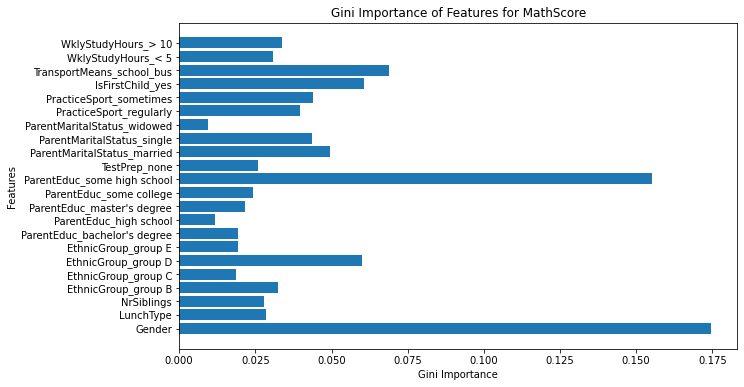

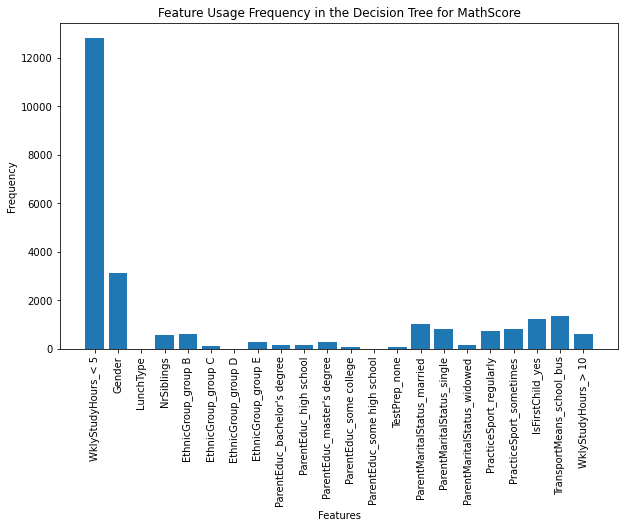

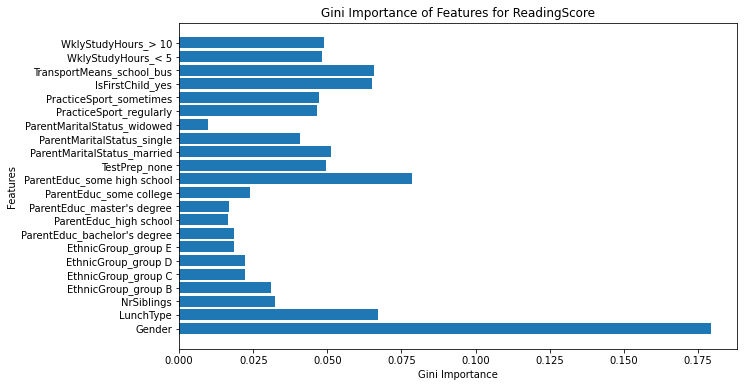

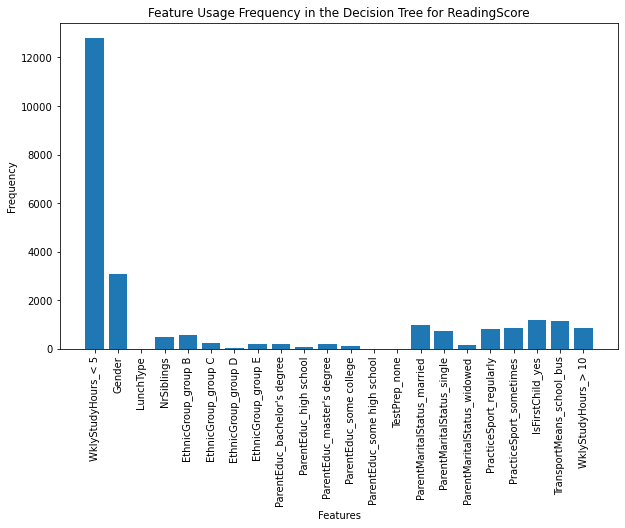

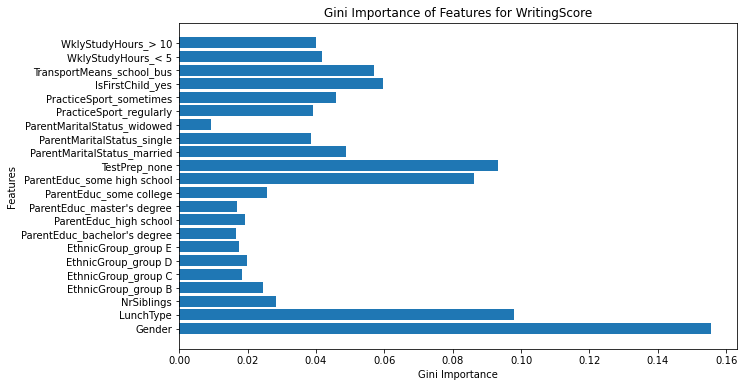

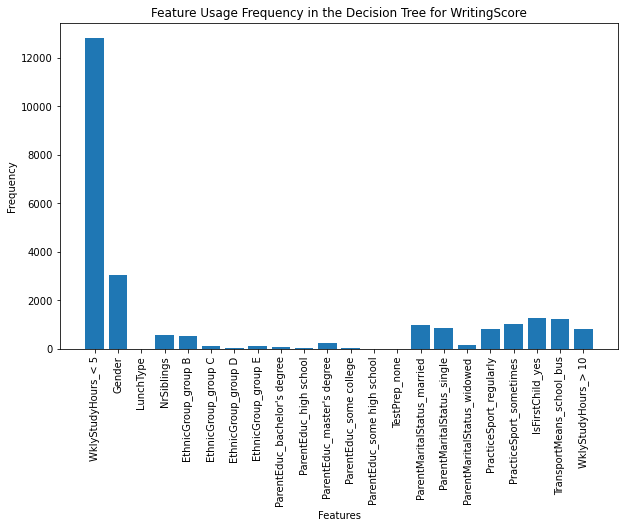

In [21]:
# Gini Importance for MathScore model
feature_names_math = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_math, feature_importances_math)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for MathScore')
plt.show()

# Feature Usage Frequency for MathScore model
node_counts_math = model_math.tree_.n_node_samples
feature_usages_math = pd.Series(model_math.tree_.feature, name='Feature Usage')
feature_usages_math = feature_usages_math.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_math[feature_usages_math.index], feature_usages_math.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for MathScore')
plt.xticks(rotation=90)
plt.show()

# Gini Importance for ReadingScore model
feature_names_reading = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_reading, feature_importances_reading)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for ReadingScore')
plt.show()

# Feature Usage Frequency for ReadingScore model
node_counts_reading = model_reading.tree_.n_node_samples
feature_usages_reading = pd.Series(model_reading.tree_.feature, name='Feature Usage')
feature_usages_reading = feature_usages_reading.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_reading[feature_usages_reading.index], feature_usages_reading.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for ReadingScore')
plt.xticks(rotation=90)
plt.show()

# Gini Importance for WritingScore model
feature_names_writing = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_writing, feature_importances_writing)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for WritingScore')
plt.show()

# Feature Usage Frequency for WritingScore model
node_counts_writing = model_writing.tree_.n_node_samples
feature_usages_writing = pd.Series(model_writing.tree_.feature, name='Feature Usage')
feature_usages_writing = feature_usages_writing.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_writing[feature_usages_writing.index], feature_usages_writing.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for WritingScore')
plt.xticks(rotation=90)
plt.show()

## Ensuring data has no NAN:
- you are ready for visualizations 

In [22]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64